In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

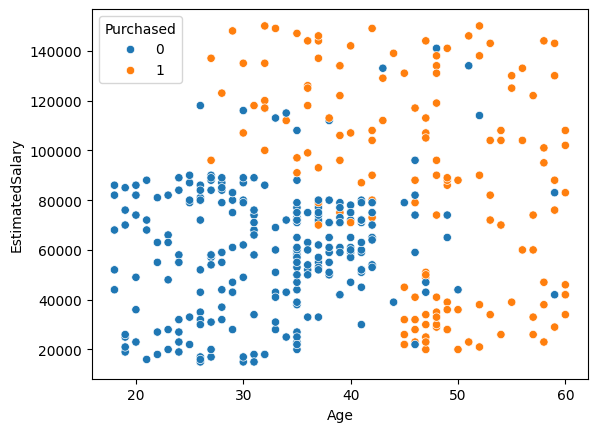

In [4]:
sns.scatterplot(data=dataset,x='Age',y='EstimatedSalary',hue='Purchased')

In [5]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0,test_size=0.25)

In [7]:
xtrain.shape,xtest.shape

((300, 2), (100, 2))

<Axes: >

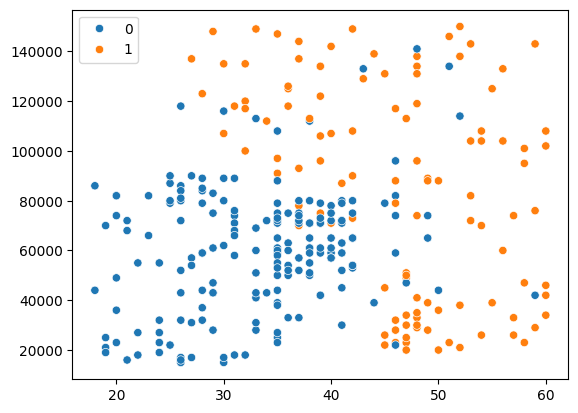

In [8]:
sns.scatterplot(x= xtrain[:,0],y = xtrain[:,1],hue=ytrain)

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [10]:
xtrain[0]

array([ 0.58164944, -0.88670699])

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
predict = model.predict(xtest)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,predict))
print(confusion_matrix(ytest,predict))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

[[62  6]
 [ 4 28]]


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.9

Text(0.5, 1.0, 'Logistic Regression Decision Boundary')

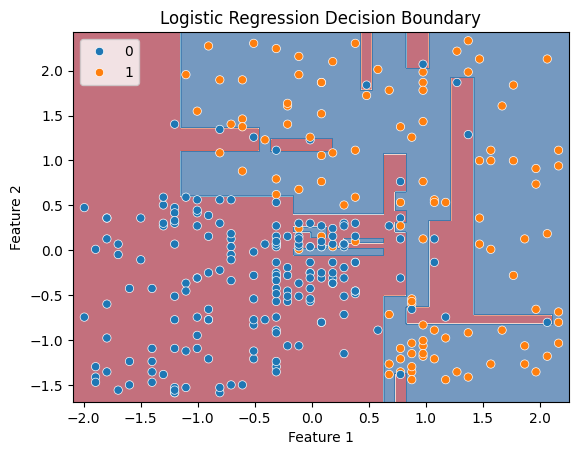

In [16]:
# Create a meshgrid to visualize the decision boundary
x_min, x_max = xtrain[:, 0].min() - 0.1, xtrain[:, 0].max() + 0.1
y_min, y_max = xtrain[:, 1].min() - 0.1, xtrain[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.RdBu, alpha=0.6)
sns.scatterplot(x= xtrain[:,0],y = xtrain[:,1],hue=ytrain)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")

Text(0.5, 1.0, 'actual')

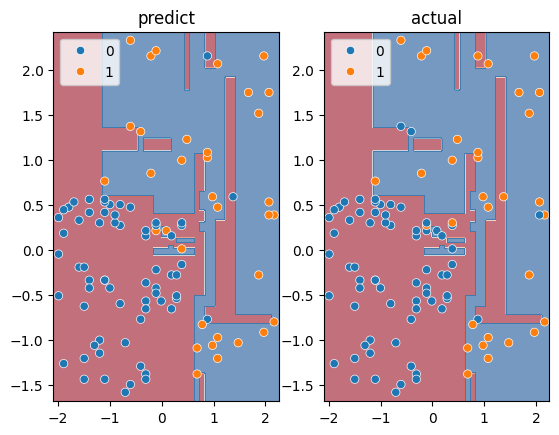

In [18]:
# Create a meshgrid to visualize the decision boundary
fig,axes = plt.subplots(1,2)
x_min, x_max = xtest[:, 0].min() - 0.1, xtest[:, 0].max() + 0.1
y_min, y_max = xtest[:, 1].min() - 0.1, xtest[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[0].contourf(xx,yy,Z, cmap=plt.cm.RdBu, alpha=0.6)
sns.scatterplot(x= xtest[:,0],y = xtest[:,1],hue=predict,ax=axes[0])
axes[0].set_title('predict')

x_min, x_max = xtest[:, 0].min() - 0.1, xtest[:, 0].max() + 0.1
y_min, y_max = xtest[:, 1].min() - 0.1, xtest[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[1].contourf(xx,yy,Z, cmap=plt.cm.RdBu, alpha=0.6)
sns.scatterplot(x= xtest[:,0],y = xtest[:,1],hue=ytest,ax=axes[1])
axes[1].set_title('actual')
